# 1. Intro

**FAQ style retrieval based chat bot**
- Train three model types (in different configurations) to figure out user input and map to a response class. Let's see which one does well. The models are
    - a TF-IDF similarity measure doc classifier 
    - a TFIDF based n-gram MLP multi-class classifier (supervised)
    - an RNN classifier (unsupervised)

**The Data**
- Pulling data from known disease/pandemic authorities such as CDC and WHO

- Also getting KE national government content. These are static data; knowledge already in place. TODO: a channel for news updates 

- Data is maintained in a Gsheet and can make updates/additions/etc from there

- Clean and classify the above data to have two datasets
    - FAQ_db: This is the knowledge base. One to one mapping of class categories and response paragraphs. Has two main fields: class_category, response_p. Additional fields: src, src_link 
    - Phrases_db: This is the training set on questions/input that users may present to the bot. Has two main fields: input_phrase, class_category 
    
**Approach**
- Retrieval based chat bot. 


# 2. Corana Dashboard by John Hopkins Uni

[Link to map FAQ](https://coronavirus.jhu.edu/map-faq)

In [1]:
### John Hopkins Dashboard - https://coronavirus.jhu.edu/map.html
from IPython.display import IFrame
## default 77.3846,11.535 
start_coordz = "77.3846,11.535"  # rabat, morocco"33.9693414,-6.9273026"
center_coordz = "28.8189834,-2.5117154" #center Bukavu, DRC "-2.5117154,28.8189834"

IFrame(src="//arcgis.com/apps/Embed/index.html?webmap=14aa9e5660cf42b5b4b546dec6ceec7c&extent="+start_coordz+",163.5174,52.8632"+
       "&center="+center_coordz+
       "&zoom=true&previewImage=false&scale=true&disable_scroll=true&theme=light", 
    width="650", height="400", frameborder="0", scrolling="no", marginheight="0", marginwidth="0", title="2019-nCoV" )

# 3. FAQ Chat bot - Part 2

- Try different models
- Fine tune hyper params
- Save best fit

**Recall::**
- INFOR   : 2020-04-06 17:38:00.251162 [dataSource.writeTo] dpath = cleaned_phrases.xftz
- INFOR   : 2020-04-06 17:38:00.252160 [dataSource.writeTo] dpath = cleaned_phrases.ylbz
- INFOR   : 2020-04-06 17:38:00.253182 [dataSource.writeTo] dpath = cleaned_phrases.faqdb
- INFOR   : 2020-04-06 17:38:00.253182 [dataSource.writeTo] dpath = cleaned_phrases.phrdb

In [2]:
# TODO: 
## Don't know why the stop words are failing and yet the last stop has the correct list :( 
## set a seed at shuffle dataset for train ,test split 

## 3.1. Vectorize
- Do TFIDF Vectorization. Can be used with similarity doc classification, n-gram MLP, 


In [3]:
import numpy as np
import pandas as pd

import nltk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
sys.path.append("../../../shared") 
import zdataset, zdata_source
from zdataset import ZGsheetFaqDataSet


import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('tensorflow').disabled = True

In [5]:
## plot settings
params = {
    'font.size' : 14.0,
    'figure.figsize': (20.0, 12.0),
    'figure.dpi' : 40
}
plt.rcParams.update(params)
plt.style.use('fivethirtyeight') #tableau-colorblind10 ggplot

In [6]:
### Load the preprocessed data 
dpath = "cleaned_phrases"
dset = ZGsheetFaqDataSet()
dset.dumpLoad( dpath, zdata_source.zSERIALIZED)


INFOR   : 2020-04-07 02:29:35.008470 [zdataset.dumpLoad] Loaded cleaned_phrases.xftz of size 141
INFOR   : 2020-04-07 02:29:35.010488 [zdataset.dumpLoad] Loaded cleaned_phrases.xidx of size 141
INFOR   : 2020-04-07 02:29:35.011459 [zdataset.dumpLoad] Loaded cleaned_phrases.ylbz of size 141
INFOR   : 2020-04-07 02:29:35.011459 [zdataset.dumpLoad] Loaded cleaned_phrases.argz of size 5
INFOR   : 2020-04-07 02:29:35.012456 [zdataset.dumpLoad] Not Found: cleaned_phrases.ctx
INFOR   : 2020-04-07 02:29:35.012456 [zdataset.dumpLoad] Not Found: cleaned_phrases.encm
INFOR   : 2020-04-07 02:29:35.013453 [zdataset.dumpLoad] Loaded cleaned_phrases.stpz of size 181
INFOR   : 2020-04-07 02:29:35.014465 [zdataset.dumpLoad] Loaded cleaned_phrases.faqdb of size 92
INFOR   : 2020-04-07 02:29:35.015449 [zdataset.dumpLoad] Loaded cleaned_phrases.phrdb of size 141


In [7]:
print("Example Featurez.Original: {}".format( dset.data[:3] ) )
print("Example Featurez.Cleaned: {}".format( dset.clean_data[:3] ) )
print("Example Label: {}".format( dset.y_labelz[:3] ) )

print("Example Featurez.Cleaned: {}".format( dset.clean_data[-1:] ) )
print("Example Label: {}".format( dset.y_labelz[-1:] ) )

Example Featurez.Original: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Featurez.Cleaned: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez.Cleaned: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']


In [8]:
#### TODO: Split training and validation <<< b/c @ shuffling and resetting index at new dset obje
#train

In [9]:
## TFIDF encode 
# ZENC_TFIDF is default 
encoder_tfidf, encoded_featurez = dset.encodeTrain(enc_type=zdataset.ZENC_TFIDF, ngramz=(2,2)) 
print("Example Encoding: {}".format( encoded_featurez[: 3] ) ) 
print("Example Encoding: {}".format( encoded_featurez[-1:] ) ) 

Example Encoding:   (1, 24)	1.0
  (2, 68)	0.7071067811865476
  (2, 173)	0.7071067811865476
Example Encoding:   (0, 205)	0.533923657905307
  (0, 167)	0.533923657905307
  (0, 75)	0.46360061208869924
  (0, 23)	0.46360061208869924


## 3.2. Cosine Similarity Model

In [10]:
from zmodel_cosine_similarity import ZCosineSimilarity

In [11]:
## setup 
model = ZCosineSimilarity('TFIDF_Cosine')
model.build( dset.context , dset.encoded_matrix)

In [12]:
## TODO: train_test_split. For now use below
val_txt = ['Is corana deadly', 
           'What is corana', 
           "Should my pet get tested", 
           "Will mosquito bite infect me", 
          "Can I vist my elderly parents", 
          "Is there a vaccineS"]

val_ylabz = ['covid19_define',
             'covid19_define',
            'pets_testing', 
            'covid19_spread_insects',
            'covid19_at_risk',
            'covid19_cure']

val_ylabz_int = dset.ylabelzAsInts(val_ylabz)


In [13]:
### Helpers
plot_valz = []

def validateModel(i=1):
    print("\n{0} {1}. PREPROCESSING @ Validation Data {0}".format("-"*6, i))
    cleaned_txt = dset.preprocessPredict( val_txt)
    
    for itx, otx in zip(val_txt, cleaned_txt):
        print("CLEANED: {} ===> {}".format(itx, otx))
        
    
    print("\n{0} {1}. PREDICT @ Validation Data {0}".format("-"*6, i+1 ))
    acc, predicted_yz = model.validate( cleaned_txt, val_ylabz_int)
    
    for idx, txt, y in  zip( predicted_yz, val_txt, val_ylabz):
        cat,resp =  dset.getPredictedAtIndex( idx )
        print("PREDICTED: {}:{} ===> {} for '{}' ".format(idx, y, cat, txt))
    #     print("\t{}\n".format(resp) )
    
    print(">>> Predicted Accuracy: {} % \n{}".format( acc, predicted_yz) ) 
    
    
def resetData(paramz, ngramz): 
    print("\n{0} 1. PREPROCESSING @ Training Data {0}".format("-"*6))
    dset.preprocess(**paramz) 
    print("Example Featurez: {}".format( dset.clean_data[:3] ) )
    print("Example Label: {}".format( dset.y_labelz[:3] ) )

    print("Example Featurez: {}".format( dset.clean_data[-1:] ) )
    print("Example Label: {}".format( dset.y_labelz[-1:] ) )
    
    
    print("\n{0} 2. ENCODE TFIDF MODEL @ Validation Data {0}".format("-"*6))
    dset.encodeTrain(ngramz=ngramz)
    model.build( dset.context , dset.encoded_matrix)
    print("TFIDF: {}".format( dset.context))

    
def resetModel(paramz, ngramz):    
    resetData( paramz, ngramz ) 
    validateModel(3)
    

In [14]:
## Using saved trained paramz

validateModel(1)


------ 1. PREPROCESSING @ Validation Data ------
CLEANED: Is corana deadly ===> corana deadly
CLEANED: What is corana ===> corana
CLEANED: Should my pet get tested ===> pet get tested
CLEANED: Will mosquito bite infect me ===> mosquito bite infect
CLEANED: Can I vist my elderly parents ===> vist elderly parent
CLEANED: Is there a vaccineS ===> vaccine

------ 2. PREDICT @ Validation Data ------
PREDICTED: 43:covid19_define ===> covid19_self_protect for 'Is corana deadly' 
PREDICTED: 43:covid19_define ===> covid19_self_protect for 'What is corana' 
PREDICTED: 38:pets_testing ===> covid19_testing for 'Should my pet get tested' 
PREDICTED: 43:covid19_spread_insects ===> covid19_self_protect for 'Will mosquito bite infect me' 
PREDICTED: 43:covid19_at_risk ===> covid19_self_protect for 'Can I vist my elderly parents' 
PREDICTED: 43:covid19_cure ===> covid19_self_protect for 'Is there a vaccineS' 
>>> Predicted Accuracy: 0.0 % 
[43 43 38 43 43 43]


### 3.2.2 Variations @ Lemmatization, n-gram=2, Stopwords

In [15]:
### 1. no change in text and uni-gram 
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
    
ngramz = (1,1)

resetModel(paramz, ngramz )


------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. PREPROCESSING @ Validation Data ------
CLEANED: Is corana deadly ===> is corana deadly
CLEANED: What is corana ===> what is corana
CLEANED: Should my pet get tes

In [16]:
### 1. clean up text and uni-gram 
paramz = {
        'remove_stopwordz' : True,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : True, 
        'lemmatized' : True, 
        'unique' : False
    }
    
ngramz = (1,1)

resetModel(paramz, ngramz )


------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. PREPROCESSING @ Validation Data ------
CLEANED: Is corana deadly ===> corana deadly
CLEANED: What is corana ===> corana
CLEANED: Should my pet get tested ===> pe

In [17]:
### 1. no change in text and bi-gram 
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
    
ngramz = (2,2)

resetModel(paramz, ngramz )


------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. PREPROCESSING @ Validation Data ------
CLEANED: Is corana deadly ===> is corana deadly
CLEANED: What is corana ===> what is corana
CLEANED: Should my pet get tes

In [18]:
### 1. no change in text and uni-gram and bigram
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
    
ngramz = (1,2)

resetModel(paramz, ngramz )


------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. PREPROCESSING @ Validation Data ------
CLEANED: Is corana deadly ===> is corana deadly
CLEANED: What is corana ===> what is corana
CLEANED: Should my pet get tes

## 3.3. Multi-class MLP 

In [19]:
from zmodel_ngram_mlp import NgramMLP

In [20]:
### Load the preprocessed data 
dpath = "cleaned_phrases"
dset = ZGsheetFaqDataSet()
dset.dumpLoad( dpath, zdata_source.zSERIALIZED)

INFOR   : 2020-04-07 02:29:37.953481 [zdataset.dumpLoad] Loaded cleaned_phrases.xftz of size 141
INFOR   : 2020-04-07 02:29:37.955475 [zdataset.dumpLoad] Loaded cleaned_phrases.xidx of size 141
INFOR   : 2020-04-07 02:29:37.955475 [zdataset.dumpLoad] Loaded cleaned_phrases.ylbz of size 141
INFOR   : 2020-04-07 02:29:37.956496 [zdataset.dumpLoad] Loaded cleaned_phrases.argz of size 5
INFOR   : 2020-04-07 02:29:37.956496 [zdataset.dumpLoad] Not Found: cleaned_phrases.ctx
INFOR   : 2020-04-07 02:29:37.957470 [zdataset.dumpLoad] Not Found: cleaned_phrases.encm
INFOR   : 2020-04-07 02:29:37.958467 [zdataset.dumpLoad] Loaded cleaned_phrases.stpz of size 181
INFOR   : 2020-04-07 02:29:37.958467 [zdataset.dumpLoad] Loaded cleaned_phrases.faqdb of size 92
INFOR   : 2020-04-07 02:29:37.959464 [zdataset.dumpLoad] Loaded cleaned_phrases.phrdb of size 141


In [21]:
## TFIDF encode 
# ZENC_TFIDF is default 
encoder_tfidf, encoded_featurez = dset.encodeTrain(enc_type=zdataset.ZENC_TFIDF, ngramz=(2,2)) 
print("Example Encoding: {}".format( encoded_featurez[: 3] ) ) 
print("Example Encoding: {}".format( encoded_featurez[-1:] ) ) 

Example Encoding:   (1, 24)	1.0
  (2, 68)	0.7071067811865476
  (2, 173)	0.7071067811865476
Example Encoding:   (0, 205)	0.533923657905307
  (0, 167)	0.533923657905307
  (0, 75)	0.46360061208869924
  (0, 23)	0.46360061208869924


In [22]:
mlpNN = NgramMLP('ngram_mlp')

In [23]:
##### Helper functions
## Plot graphs 
def plot_graphs(fhist, metric): 
    plt.plot(fhist[ metric ] )
    plt.plot( fhist['val_'+metric ] , '')
    plt.xlabel('Epochs')
    plt.ylabel( metric )
    plt.legend( [ metric, 'val_'+metric ] )
    plt.show()
    
def build_and_compile(build_paramz, i):
    print("\n{0} {1}. BUILD model {0}".format("-"*6, i ))
    mlpNN.build( dset.context, dset.encoded_matrix, dset.ylabelzAsInts(), **build_paramz )
    print(" n_classes @ ylabz.size = {}".format( len(dset.ylabelzAsInts() ) ) ) 
    print("{}".format( mlpNN.model.summary() ) ) 
    return i+1
    

def train_and_validate(train_paramz, i):
    print("\n{0} {1}. TRAIN model{0}".format("-"*6, i ))
    val_x = dset.encodePredict(val_txt) 
    val_y = np.array(  val_ylabz_int )
    val_x_y_pair = (val_x,  val_y) 
    print("val_encoded: {}, val_labelz: {}".format( val_x.shape, val_y.shape))
    train_hist = mlpNN.train( val_x_y_pair, **train_paramz)
    
    print("FINISHED: Validation: Accuracy = {} Loss = {}".format(
            train_hist['val_acc'][-1], train_hist['val_loss'][-1]
            ))
    plot_graphs(train_hist, 'acc' ) 
    
def resetModel_and_validate(paramz, ngramz, build_paramz, train_paramz):
    i = 3
    resetData( paramz, ngramz)     
    i = build_and_compile(build_paramz, i)
    i = train_and_validate(train_paramz, i)
    
    
def doEDAData(build_paramz, train_paramz):
    i = 1
    i = build_and_compile(build_paramz, i)
    i = train_and_validate(train_paramz, i)
   

INFOR   : 2020-04-07 02:29:38.017310 [MLP.build] input_shapez = (335,)


{'n_classez': 90, 'vocab_size': 253, 't_ratio': 37.022346368715084, 'n_hidden_layerz': 2, 'n_hidden_unitz': 64, 'dropout_rate': 0.2, 'learning_rate': 0.001}

------ 1. BUILD model ------
 n_classes @ ylabz.size = 141
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 335)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                21504     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                5850      
Total params: 27,354
Trainable params: 27,354
Non-trainable params: 0
_________________________________________________________________
None

------ 2. TRAIN model------

INFOR   : 2020-04-07 02:29:38.772789 [MLP.train] FINISHED: Epochs 10. Validation: Accuracy = 0.0 Loss = 4.50490665435791
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.3

findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal black normal>) = 10.525
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal nor

findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) i

findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal bold condensed>) = 10.535
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT'

FINISHED: Validation: Accuracy = 0.0 Loss = 4.50490665435791


findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Engravers MT' (ENGR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal demi normal>) = 11.24
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal 

findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Centa

findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal medium normal>) = 10.145
findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailu.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal bold condensed>) = 7.8986363636363635
findfont: score(<Font 'Leelawadee' (LEELAWAD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal bold normal>) = 11.335
findfont: score(<Font 'Arial' (arial.ttf) norma

findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal black normal>) = 11.525
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 7.698636363636363
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
findfont: score(<Font 'Leelawadee' (LEELAWDB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua Titlin

findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal demibold normal>) = 10.24
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light nor

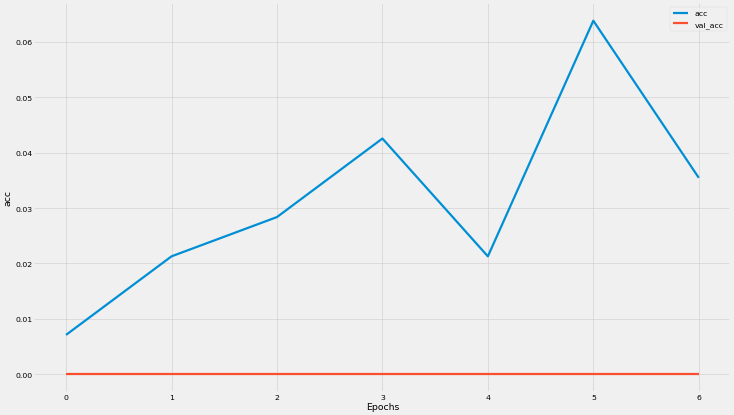

In [24]:
### ----- EDA configuration 
## model layers and compile paramz 
build_paramz = {    
        'n_classez' : dset.getNumberClasses(), 
        'vocab_size' : len( dset.getVocab() ),
        't_ratio' : dset.thresholdRatio(), 
        'n_hidden_layerz' : 2, 
        'n_hidden_unitz' : 128, 
        'dropout_rate' : 0.2,
        'learning_rate' : 1e-3
}

## training paramz 
train_paramz = {
        'epochs' : 100,
        'batch_size' : 128,} 

print( build_paramz)
doEDAData(build_paramz, train_paramz)

INFOR   : 2020-04-07 02:29:39.189675 [MLP.build] input_shapez = (252,)



------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. BUILD model ------
 n_classes @ ylabz.size = 141
Model: "sequential_1"
_________________________________________________________________
Layer (type)            

INFOR   : 2020-04-07 02:29:39.742197 [MLP.train] FINISHED: Epochs 10. Validation: Accuracy = 0.0 Loss = 4.480865955352783


FINISHED: Validation: Accuracy = 0.0 Loss = 4.480865955352783


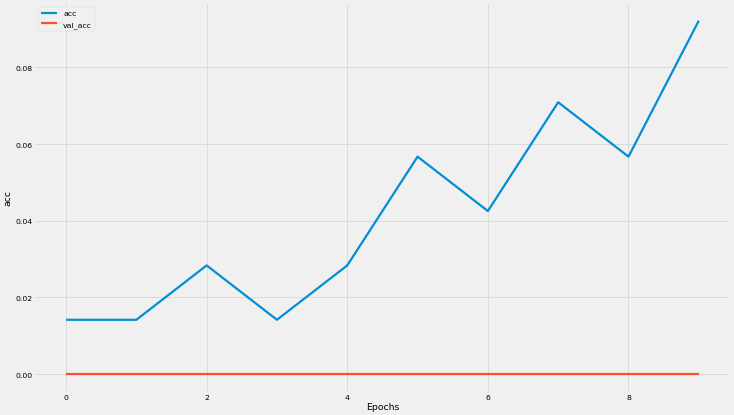

In [25]:
### ----- use no input change 
## data prep and encoding 
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
ngramz = (1,1)
resetModel_and_validate(paramz, ngramz, build_paramz, train_paramz)

INFOR   : 2020-04-07 02:29:39.863873 [MLP.build] input_shapez = (335,)



------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

------ 3. BUILD model ------
 n_classes @ ylabz.size = 141
Model: "sequential_2"
_________________________________________________________________
Layer (type)            

INFOR   : 2020-04-07 02:29:40.376501 [MLP.train] FINISHED: Epochs 10. Validation: Accuracy = 0.3333333432674408 Loss = 4.4959940910339355


FINISHED: Validation: Accuracy = 0.3333333432674408 Loss = 4.4959940910339355


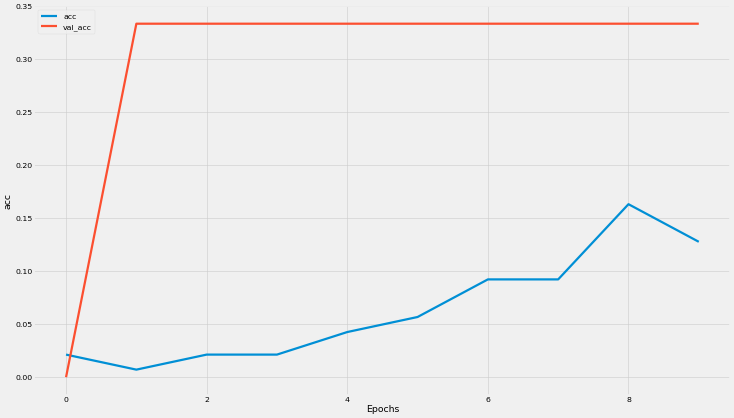

In [26]:
### ----- use bigrams bila lemma 
## data prep and encoding 
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
ngramz = (2,2)
resetModel_and_validate(paramz, ngramz, build_paramz, train_paramz)


------ 1. PREPROCESSING @ Training Data ------
Example Featurez: ['pandemic' 'cause pandemic' 'mean declared pandemic']
Example Label: ['pandemic_define' 'pandemic_causes' 'pandemic_WHO']
Example Featurez: ['make cat dog pet sick']
Example Label: ['pets_infection_cdc']

------ 2. ENCODE TFIDF MODEL @ Validation Data ------
TFIDF: TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

INFOR   : 2020-04-07 02:29:40.526102 [MLP.build] input_shapez = (335,)




------ 3. BUILD model ------
 n_classes @ ylabz.size = 141
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 335)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                21504     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
___________________________________________________________

INFOR   : 2020-04-07 02:29:41.363860 [MLP.train] FINISHED: Epochs 10. Validation: Accuracy = 0.0 Loss = 4.478023052215576


FINISHED: Validation: Accuracy = 0.0 Loss = 4.478023052215576


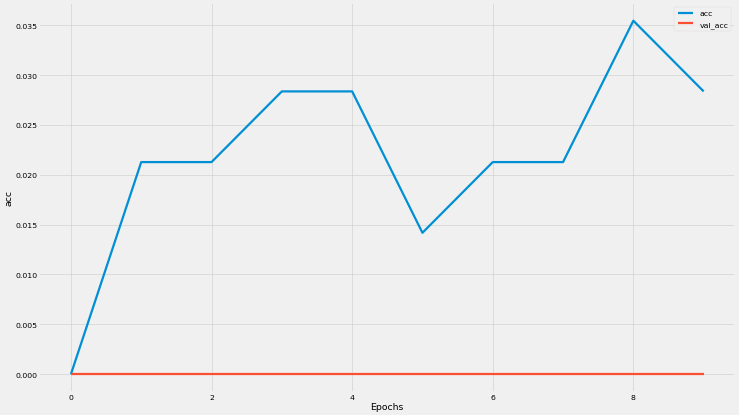

In [27]:
### ----- use bigrams bila lemma AND 6 hidden layers
## data prep and encoding 
paramz = {
        'remove_stopwordz' : False,
        'stop_wordz' : None, #use default english 
        'remove_numberz' : False, 
        'lemmatized' : False, 
        'unique' : False
    }
ngramz = (2,2)

build_paramz = {    
        'n_classez' : dset.getNumberClasses(), 
        'vocab_size' : len( dset.getVocab() ),
        't_ratio' : dset.thresholdRatio(), 
        'n_hidden_layerz' : 6, 
        'n_hidden_unitz' : 128, 
        'dropout_rate' : 0.2,
        'learning_rate' : 1e-3
}


resetModel_and_validate(paramz, ngramz, build_paramz, train_paramz)